In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iam-dataset-modified/upload/train_list.txt
/kaggle/input/iam-dataset-modified/upload/val_list.txt
/kaggle/input/iam-dataset-modified/upload/val/a01-038-06.png
/kaggle/input/iam-dataset-modified/upload/val/g06-031d-06.png
/kaggle/input/iam-dataset-modified/upload/val/j06-022-03.png
/kaggle/input/iam-dataset-modified/upload/val/b01-073-07.png
/kaggle/input/iam-dataset-modified/upload/val/p03-103-01.png
/kaggle/input/iam-dataset-modified/upload/val/p03-112-07.png
/kaggle/input/iam-dataset-modified/upload/val/m06-056-01.png
/kaggle/input/iam-dataset-modified/upload/val/e07-003-09.png
/kaggle/input/iam-dataset-modified/upload/val/g02-062-04.png
/kaggle/input/iam-dataset-modified/upload/val/k04-014-01.png
/kaggle/input/iam-dataset-modified/upload/val/g06-047h-01.png
/kaggle/input/iam-dataset-modified/upload/val/h05-012-01.png
/kaggle/input/iam-dataset-modified/upload/val/b04-103-00.png
/kaggle/input/iam-dataset-modified/upload/val/n04-092-01.png
/kaggle/input/iam-dataset-modifi

In [2]:
os.listdir('/kaggle/input/iam-dataset-modified/upload/')

['train_list.txt', 'val_list.txt', 'val', 'train']

In [3]:
with open('/kaggle/input/iam-dataset-modified/upload/train_list.txt') as f:
    contents = f.readlines()

lines_train = [line.strip() for line in contents] 

In [4]:
# with open('/kaggle/input/iam-dataset-modified/upload/val_list.txt') as f:
#     contents = f.readlines()

# lines_test = [line.strip() for line in contents] 

In [5]:
print('Number of label in training data:',len(lines_train))
# print('Number of label in testing data:',len(lines_test))

Number of label in training data: 12686


In [6]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [7]:
len(os.listdir('/kaggle/input/iam-dataset-modified/upload/train/'))

12686

In [8]:
os.listdir('/kaggle/input/iam-dataset-modified/upload/train/')[:10]

['a05-022-05.png',
 'k02-036-02.png',
 'g06-042k-02.png',
 'n04-107-03.png',
 'm04-061-03.png',
 'f07-013-06.png',
 'c03-000e-00.png',
 'g01-039-08.png',
 'd04-089-03.png',
 'r03-090-05.png']

In [9]:
lines_train[:10]

['G:/Ateva_Project/My_project/data/lines/c04/c04-044/c04-044-07.png\tre-book Gene Detroy and his performing chimpanzees',
 'G:/Ateva_Project/My_project/data/lines/g06/g06-047c/g06-047c-04.png\tdisciples among unorthodox medical men in the',
 'G:/Ateva_Project/My_project/data/lines/k07/k07-141/k07-141-00.png\tOi , not yet , you oaf . What do you think my',
 'G:/Ateva_Project/My_project/data/lines/j06/j06-051/j06-051-02.png\twhen it occurs before dawn ; but this',
 "G:/Ateva_Project/My_project/data/lines/c03/c03-084e/c03-084e-00.png\tMr. Bryan Stonehouse's production is quietly",
 'G:/Ateva_Project/My_project/data/lines/b04/b04-134/b04-134-07.png\tphilosopher with a highly developed sense of publicity',
 'G:/Ateva_Project/My_project/data/lines/h01/h01-018/h01-018-02.png\tseparate occupation and forming a private and structurally',
 'G:/Ateva_Project/My_project/data/lines/h07/h07-028/h07-028-08.png\tshops at the heart of the',
 'G:/Ateva_Project/My_project/data/lines/a04/a04-047/a04-047-0

In [10]:
%%time

d = defaultdict(list)

image_path = os.listdir('/kaggle/input/iam-dataset-modified/upload/train/')

for i in range(len(image_path)):
    for j in range(len(lines_train)):
        #print(lines_train[j].split('lines')[1].split('.png')[0].split('/')[3])
        if image_path[i] == lines_train[j].split('lines')[1].split('.png')[0].split('/')[3] + '.png':
            d['image_path'].append('/kaggle/input/iam-dataset-modified/upload/train/' + image_path[i])
            d['label'].append(lines_train[j].split('.png\t')[1])
            break     
    
train_df = pd.DataFrame(d)

CPU times: user 1min 8s, sys: 3.04 s, total: 1min 11s
Wall time: 1min 11s


In [11]:
train_df.head()

image_path  \
0  /kaggle/input/iam-dataset-modified/upload/trai...   
1  /kaggle/input/iam-dataset-modified/upload/trai...   
2  /kaggle/input/iam-dataset-modified/upload/trai...   
3  /kaggle/input/iam-dataset-modified/upload/trai...   
4  /kaggle/input/iam-dataset-modified/upload/trai...   

                                               label  
0            is at odds with the Service chiefs over  
1  ' That 's not necessary if you want to rest , ...  
2  6tic douloureux . As early as 1830 , when Angl...  
3      found him curiously stimulating . " You 're a  
4  the mask , now , Ifor did . " Dai Pugh , " he ...

In [12]:
train_df.shape

(12686, 2)

In [13]:
import cv2

In [14]:
import random

def Rand(start, end, num):
    res = []
  
    for j in range(num):
        res.append(random.randint(start, end))
  
    return res

In [15]:
train_df.shape

(12686, 2)

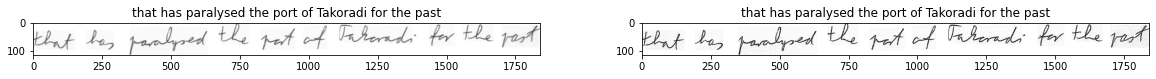

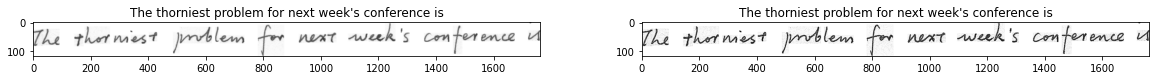

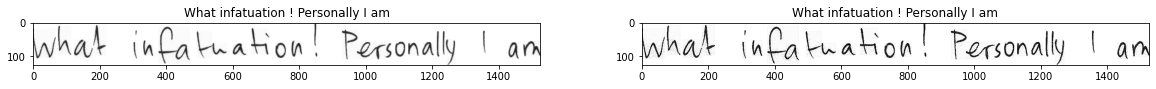

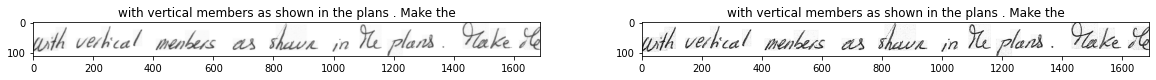

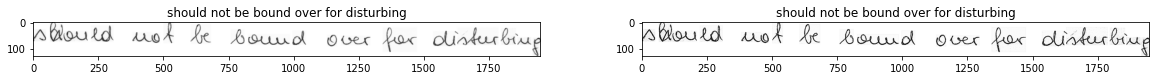

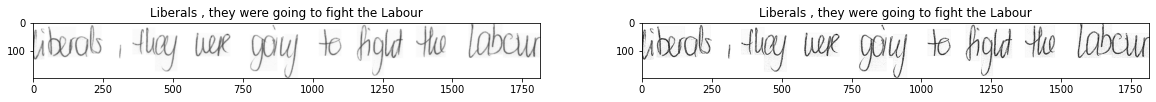

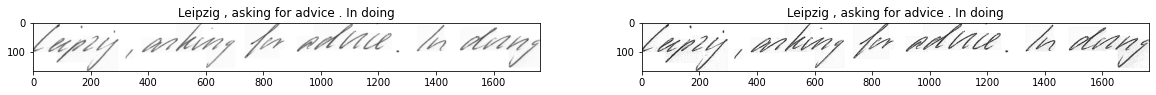

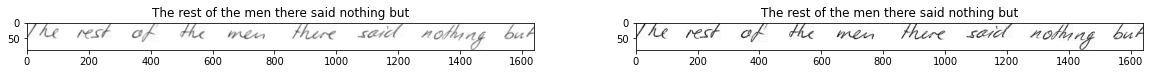

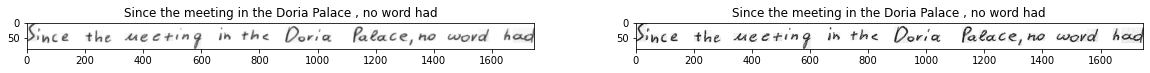

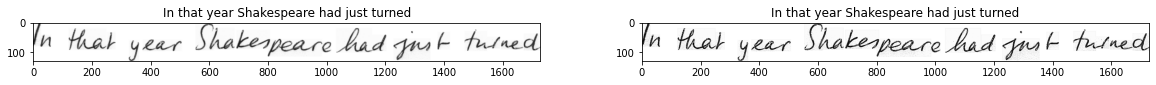

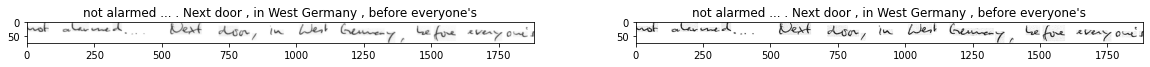

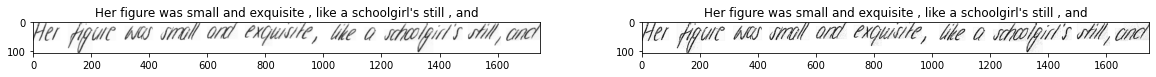

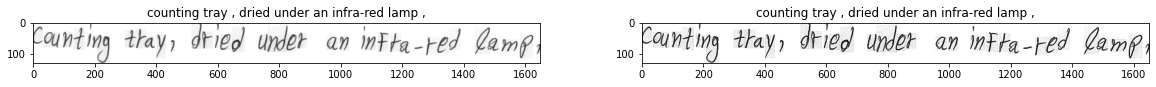

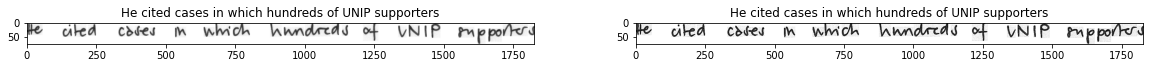

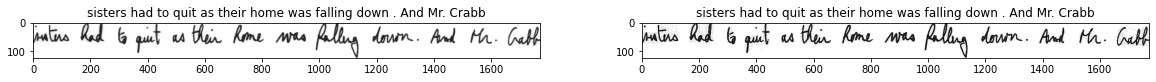

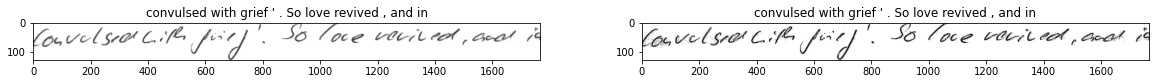

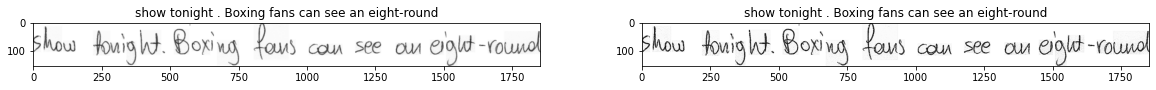

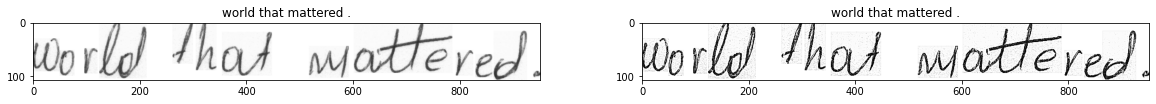

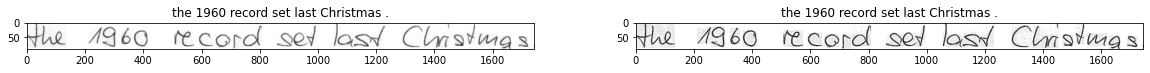

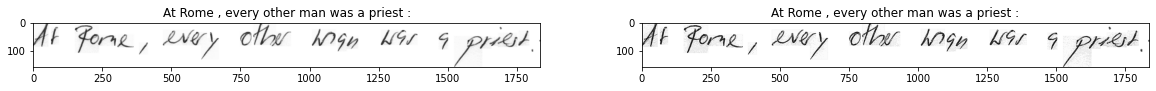

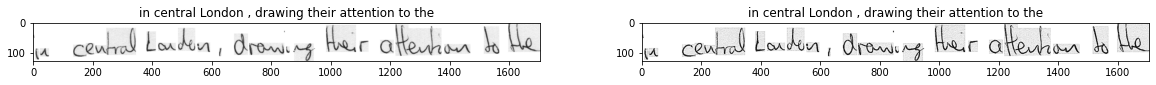

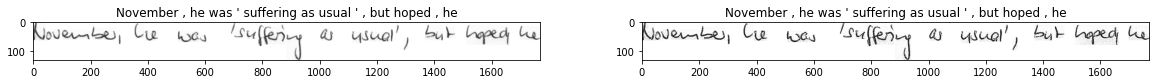

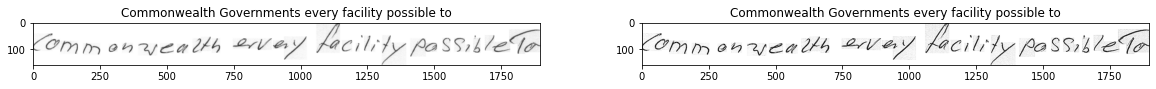

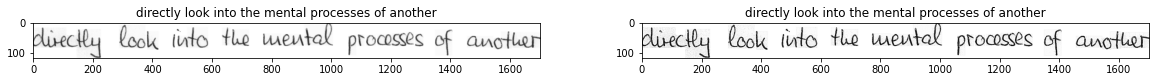

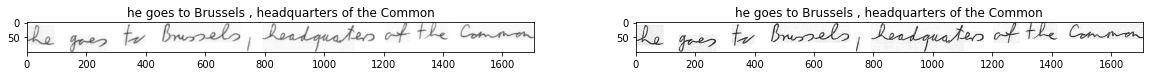

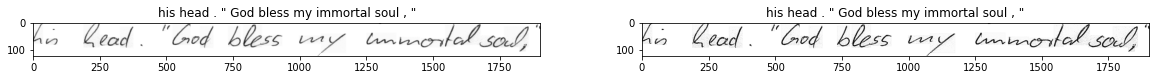

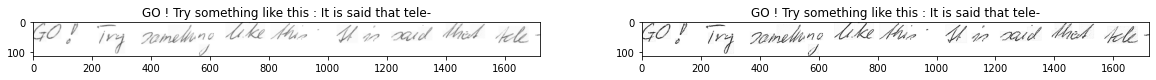

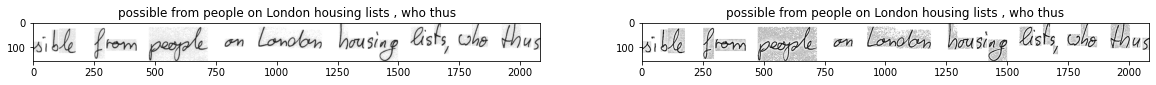

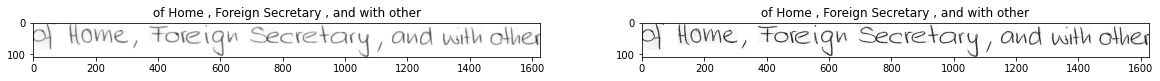

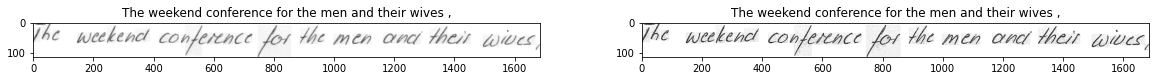

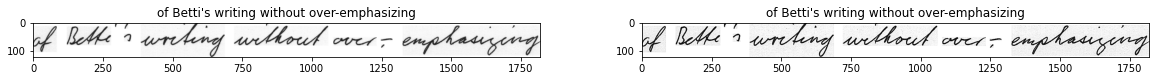

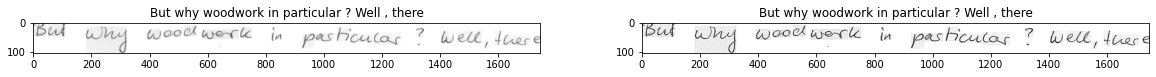

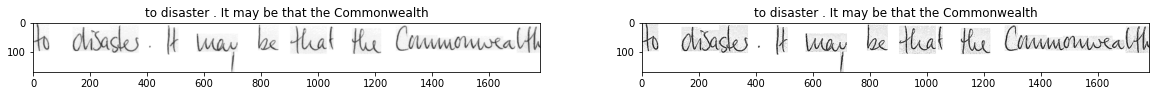

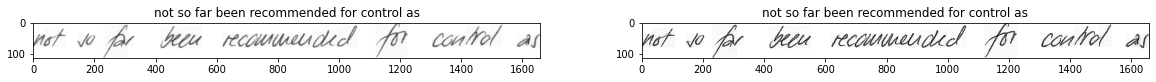

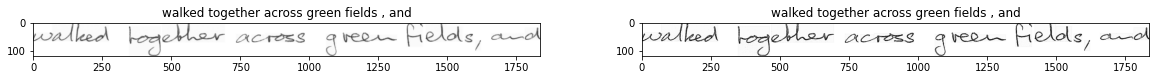

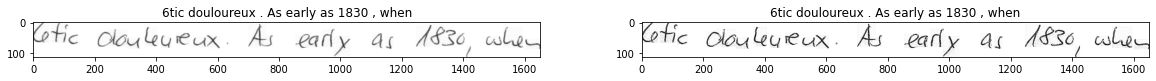

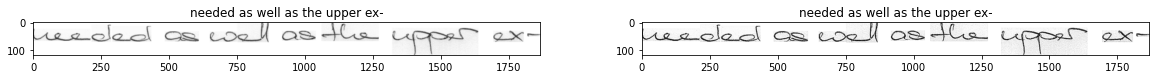

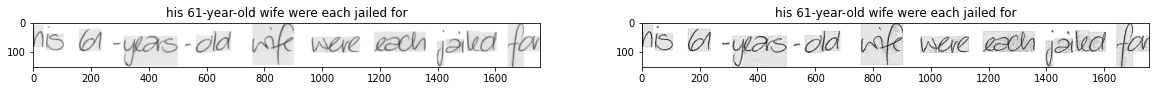

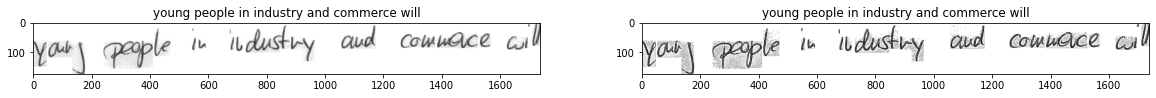

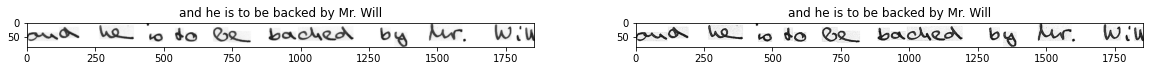

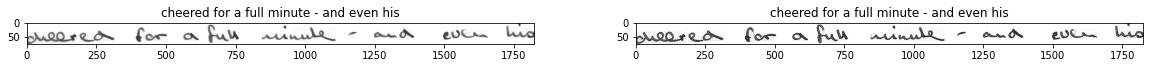

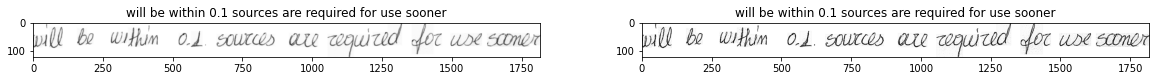

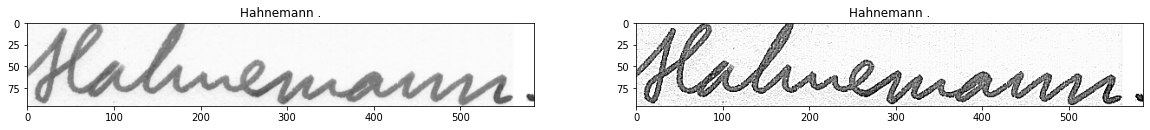

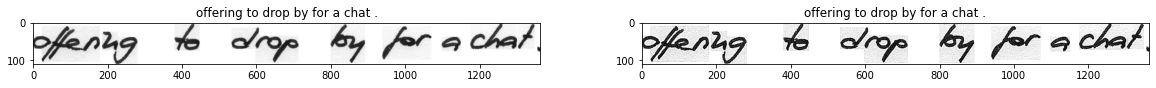

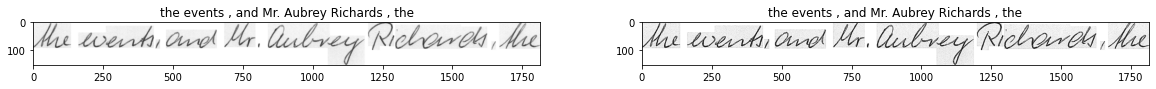

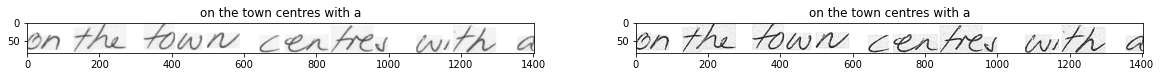

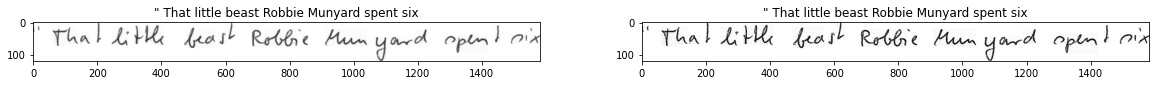

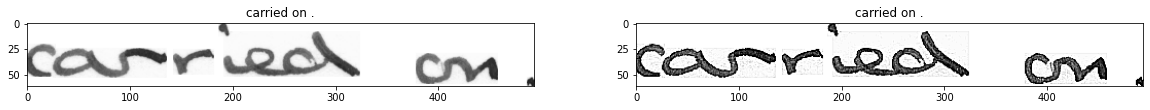

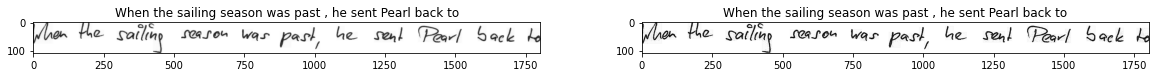

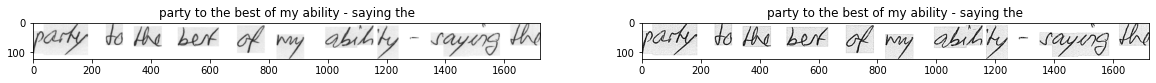

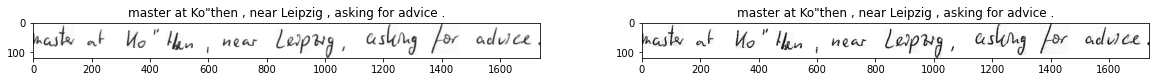

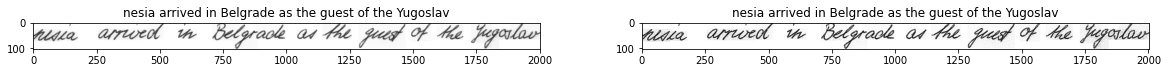

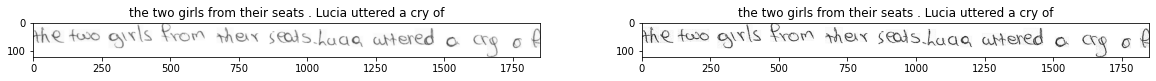

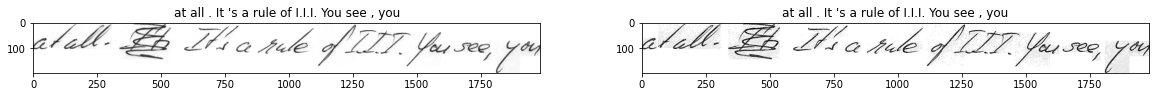

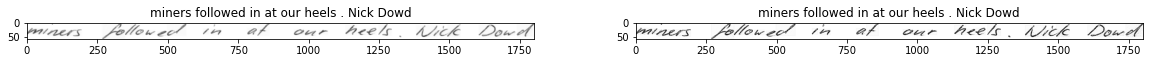

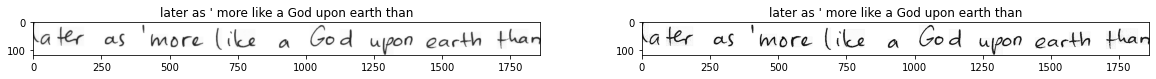

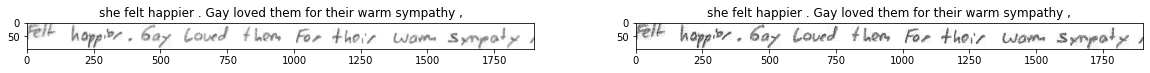

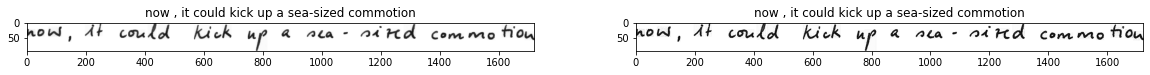

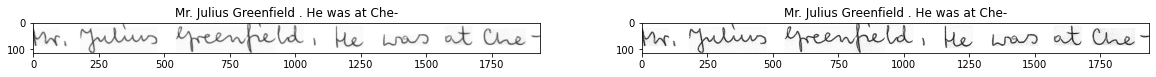

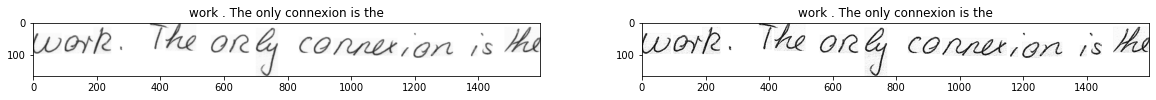

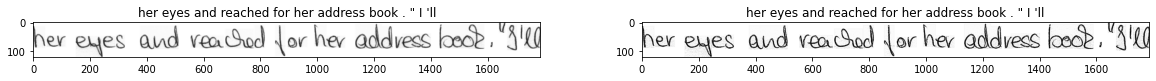

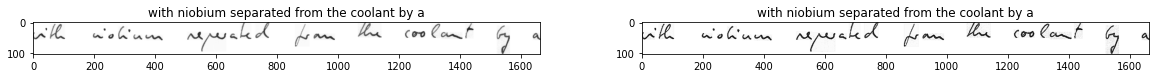

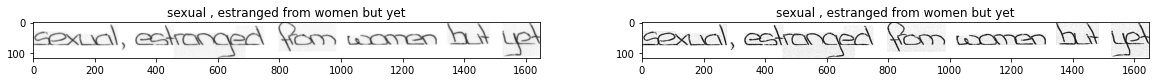

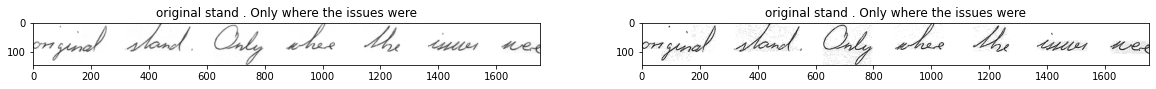

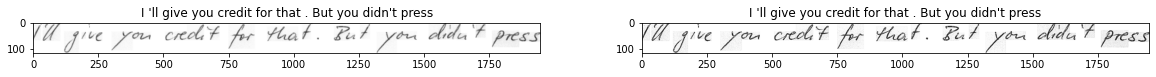

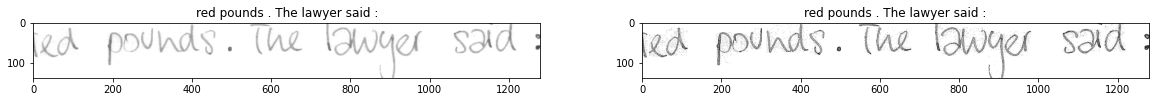

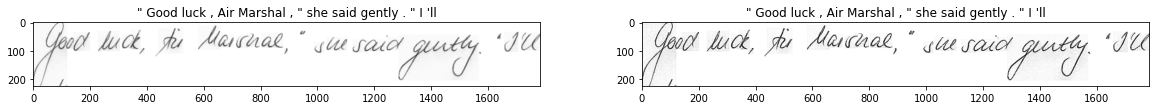

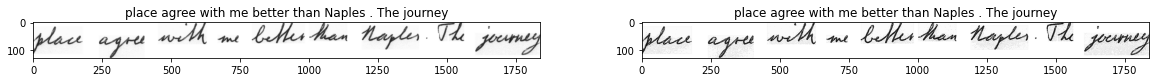

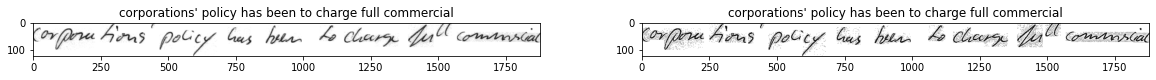

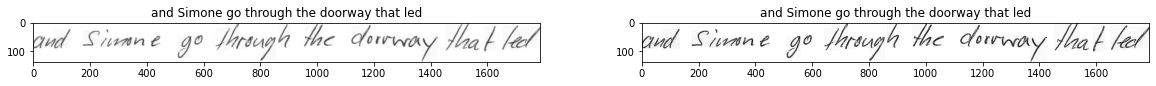

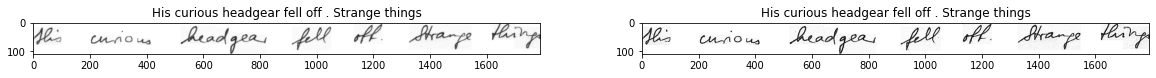

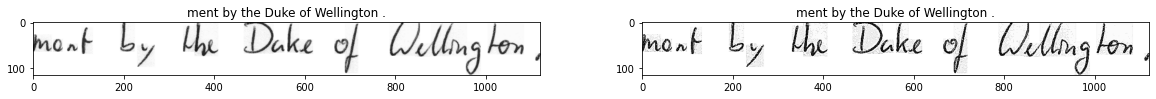

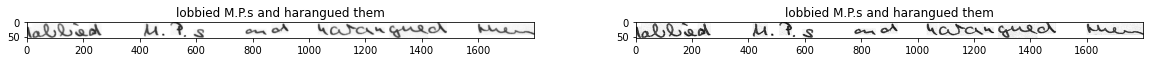

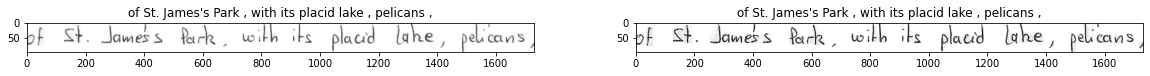

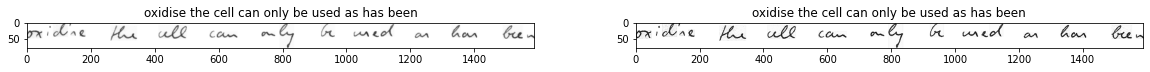

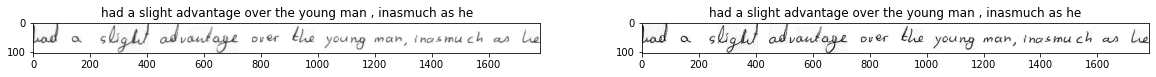

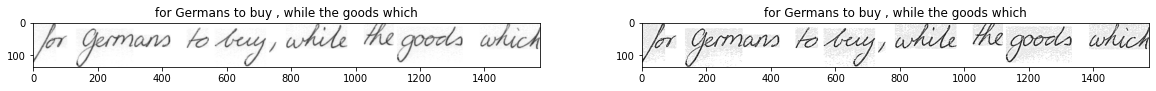

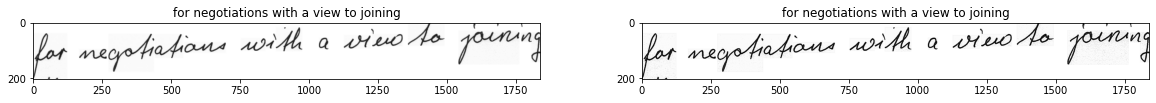

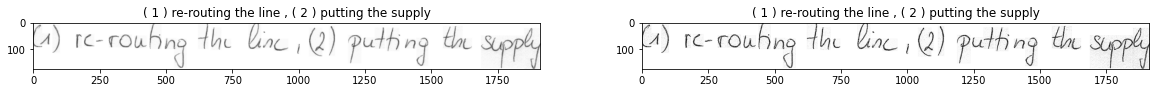

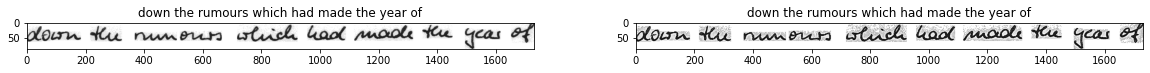

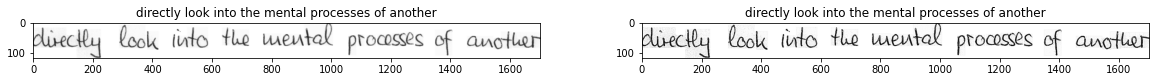

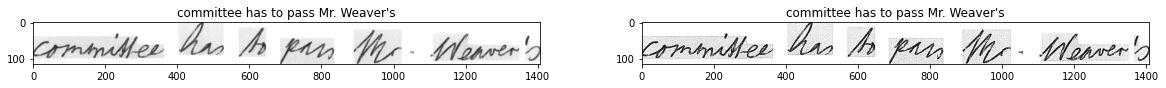

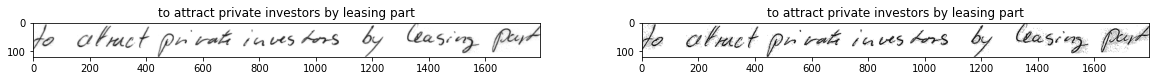

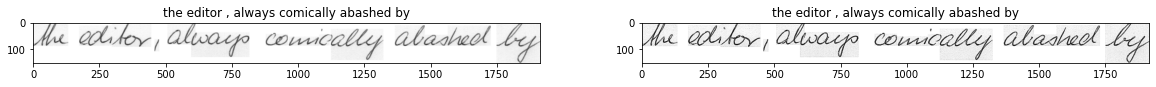

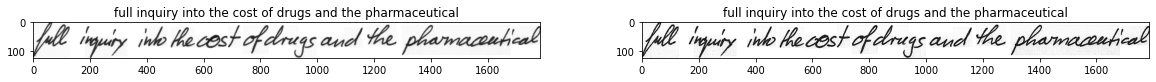

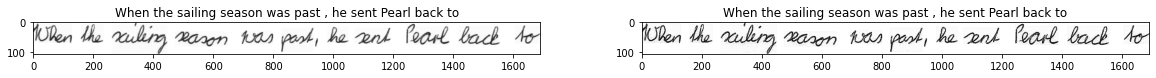

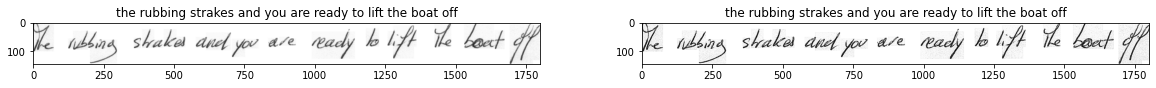

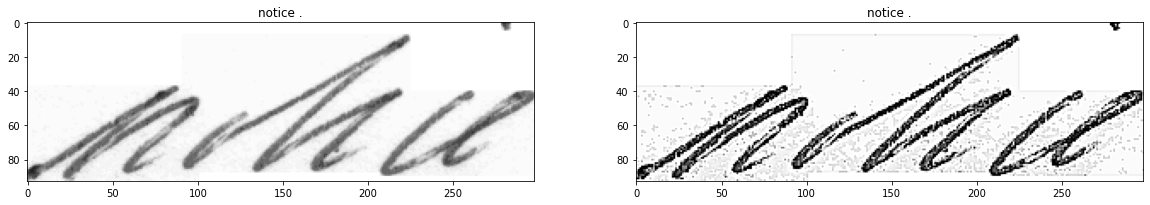

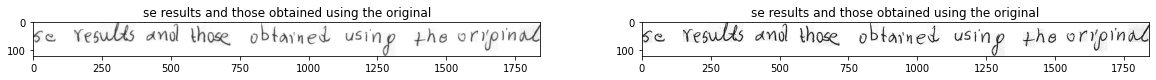

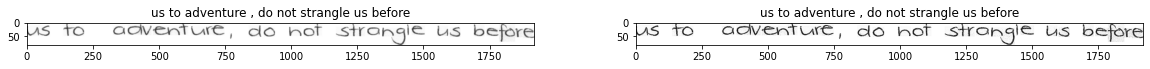

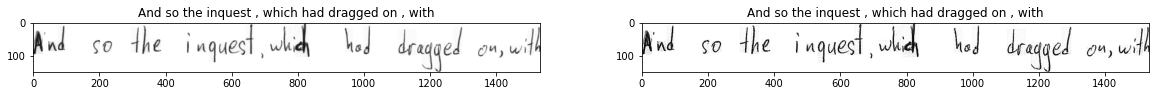

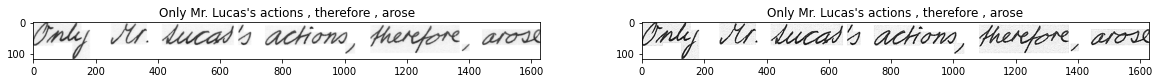

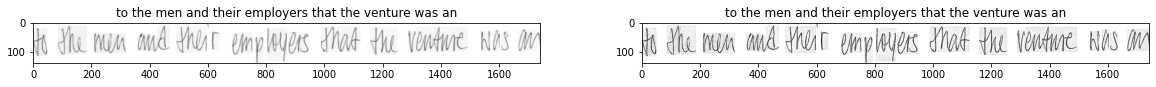

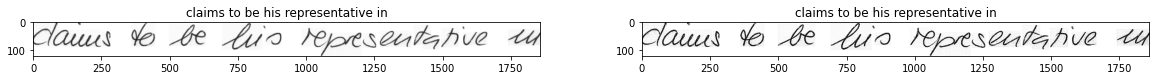

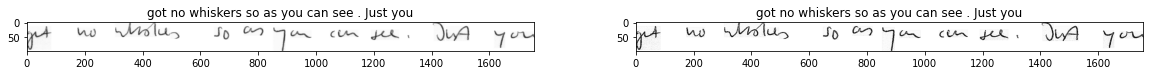

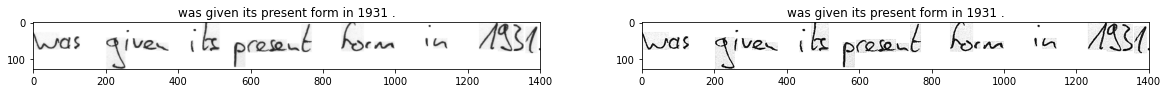

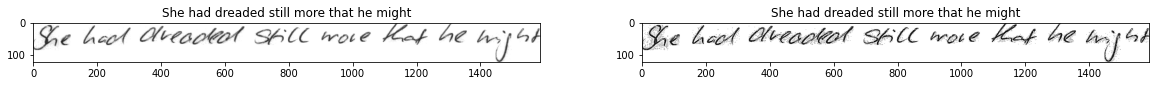

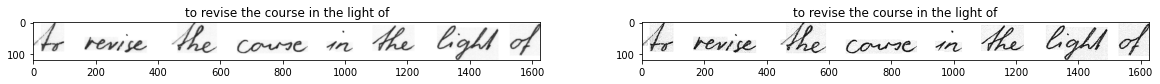

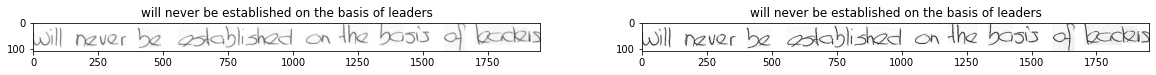

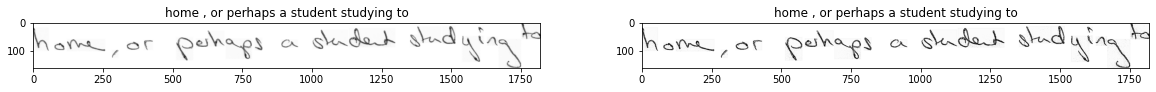

In [16]:
rand_num_list = Rand(0, 8000, 100)

for i in rand_num_list:
    img = cv2.imread(train_df['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.title(train_df['label'][i])
    plt.imshow(img)

    kernel_sharpening = np.array([[-1,-1,-1], 
                                  [-1,9,-1], 
                                  [-1,-1,-1]])


    sharpened = cv2.filter2D(img, -1, kernel_sharpening)


    plt.subplot(1, 2, 2)
    plt.title(train_df['label'][i])
    plt.imshow(sharpened)
    plt.show()

In [17]:
import string

max_label_len = 0

#char_list = "!\"#&@'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
char_list = string.printable + string.ascii_letters + string.digits

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))
        
    return dig_lst

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 162


In [18]:
images = []
labels = []

RECORDS_COUNT = train_df.shape[0]

train_images = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []

valid_images = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []

inputs_length = []
labels_length = []

In [19]:
def process_image(img):
    """
    Converts image to shape (150, 1000, 1) & normalize
    """
    w, h = img.shape

    # Aspect Ratio Calculation
    new_w = 150
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape
    
    img = img.astype('float32')
    
    # Converts each to (32, 128, 1)
    if w < 150:
        add_zeros = np.full((150-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
    if h < 1000:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
        
    if h > 1000 or w > 150:
        dim = (1000,150)
        img = cv2.resize(img, dim)
    
    img = cv2.subtract(255, img)
    
    img = np.expand_dims(img, axis=2)
    
    # Normalize 
    img = img / 255
    
    return img

In [20]:
%%time

i = 0
for index, line in enumerate(lines_train):
    filepath = train_df.loc[i, 'image_path']
    word = train_df.loc[i, 'label']
    # process image
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    try:
        img = process_image(img)
        plt.imshow(img)
    except:
        i += 1
        continue
        
    # process label
    #print(train_df.loc[i, 'label'])
    label = encode_to_labels(word)

    if index % 8 == 0:
        valid_images.append(img)
        valid_labels.append(label)
        valid_input_length.append(25)
        valid_label_length.append(len(word))
        valid_original_text.append(word)
    else:
        train_images.append(img)
        train_labels.append(label)
        train_input_length.append(25)
        train_label_length.append(len(word))
        train_original_text.append(word)

    if len(word) > max_label_len:
        max_label_len = len(word)
    
    i += 1
    
    if i >= RECORDS_COUNT:
        break

CPU times: user 1min 41s, sys: 1min 14s, total: 2min 56s
Wall time: 1min 51s
Error in callback <function flush_figures at 0x7fe2b9332a70> (for post_execute):


KeyboardInterrupt: 

In [ ]:
i

In [21]:
len(train_images), len(valid_images), len(train_labels), len(valid_labels)

(10735, 1544, 10735, 1544)

In [22]:
import gc

del train_df, image_path, lines_train
gc.collect()

44

In [23]:
!pip install keras_tqdm

In [24]:
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [25]:
import tensorflow as tf

#ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [26]:
from tensorflow.python.client import device_lib

# Check all available devices if GPU is available
print(device_lib.list_local_devices())
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9004053474788804649
]
Device mapping: no known devices.


In [27]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [28]:
train_padded_label = pad_sequences(train_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))

valid_padded_label = pad_sequences(valid_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))

In [ ]:
train_images = np.asarray(train_images)
train_input_length = np.asarray(train_input_length)
train_label_length = np.asarray(train_label_length)

valid_images = np.asarray(valid_images)
valid_input_length = np.asarray(valid_input_length)
valid_label_length = np.asarray(valid_label_length)

In [ ]:
train_images.shape

In [ ]:
# input with shape of height=32 and width=128 
inputs = Input(shape=(150,1000,1))
 
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)
 
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(blstm_1)
 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [ ]:
act_model.summary()

In [ ]:
the_labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, the_labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)

In [ ]:
batch_size = 8
epochs = 5
e = str(epochs)
optimizer_name = 'adam'

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = optimizer_name, metrics=['accuracy'])

filepath="{}o-{}r-{}e-{}t-{}v.hdf5".format(optimizer_name,
                                          str(RECORDS_COUNT),
                                          str(epochs),
                                          str(train_images.shape[0]),
                                          str(valid_images.shape[0]))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
stop

In [ ]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
history = model.fit(x=[train_images, train_padded_label, train_input_length, train_label_length],
                    y=np.zeros(len(train_images)),
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=([valid_images, valid_padded_label, valid_input_length, valid_label_length], [np.zeros(len(valid_images))]),
                    verbose=1,callbacks=callbacks_list)

In [ ]:
# predict outputs on validation images
prediction = act_model.predict(train_images[150:170])
 
# use CTC decoder
decoded = K.ctc_decode(prediction,   
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]

out = K.get_value(decoded)

# see the results
for i, x in enumerate(out):
    print("original_text =  ", train_original_text[150+i])
    print("predicted text = ", end = '')
    for p in x:
        if int(p) != -1:
            print(char_list[int(p)], end = '')
    plt.imshow(train_images[150+i].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    print('\n')

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

In [ ]:
plotgraph(epochs, loss, val_loss)

In [ ]:
plotgraph(epochs, acc, val_acc)